HR ANALYTICS CAPSTONE PROJECT
Employee Attrition & Salary Prediction
Author: Dharshana B
Date: January 2026

In [479]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Machine Learning - Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Machine Learning - Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    mean_absolute_error, mean_squared_error, r2_score
)

In [480]:
# Load the data
df = pd.read_csv('/home/intellect/Documents/Supervised_HR_Analytics/WA_Fn-UseC_-HR-Employee-Attrition.xls')
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")



Shape: (1470, 35)
Rows: 1470, Columns: 35


In [481]:
print(f"\nFirst 5 rows:")
df.head()


First 5 rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [482]:
print("\n3.1 Dataset Info:")
print(df.info())


3.1 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLe

In [483]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [484]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [485]:
df.duplicated().sum()

np.int64(0)

In [486]:
print("\nMonthly Income Statistics:")
print(f"Min: ${df['MonthlyIncome'].min():,.0f}")
print(f"Max: ${df['MonthlyIncome'].max():,.0f}")
print(f"Mean: ${df['MonthlyIncome'].mean():,.0f}")
print(f"Median: ${df['MonthlyIncome'].median():,.0f}")


Monthly Income Statistics:
Min: $1,009
Max: $19,999
Mean: $6,503
Median: $4,919


Visulizations

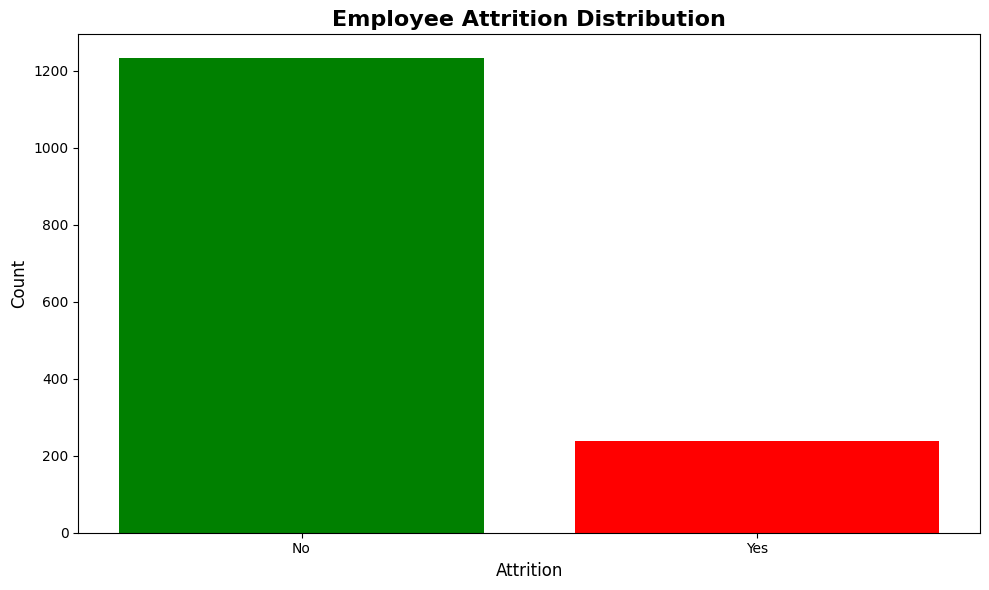

In [487]:
plt.figure(figsize=(10,6))
attrition_counts=df['Attrition'].value_counts()
plt.bar(attrition_counts.index,attrition_counts.values,color=['green','red'])
plt.title("Employee Attrition Distribution",fontsize=16,fontweight='bold')
plt.xlabel('Attrition',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tight_layout()
plt.show()

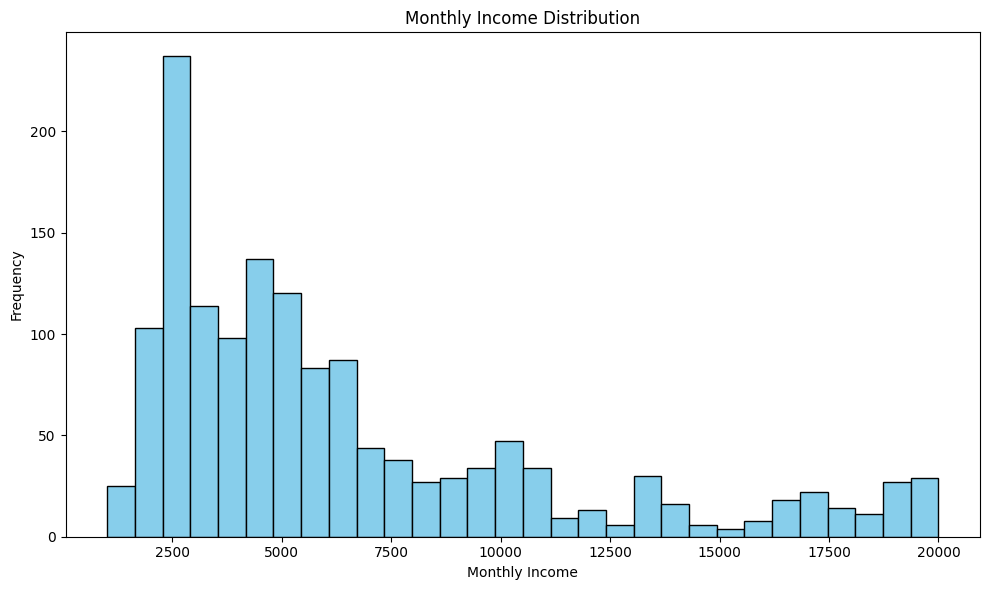

In [488]:
plt.figure(figsize=(10,6))
plt.hist(df['MonthlyIncome'],bins=30,color='skyblue',edgecolor='black')
plt.title("Monthly Income Distribution")
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/tmp/ipykernel_12646/3640527718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition',y='MonthlyIncome',data=df,palette=['green','red'])


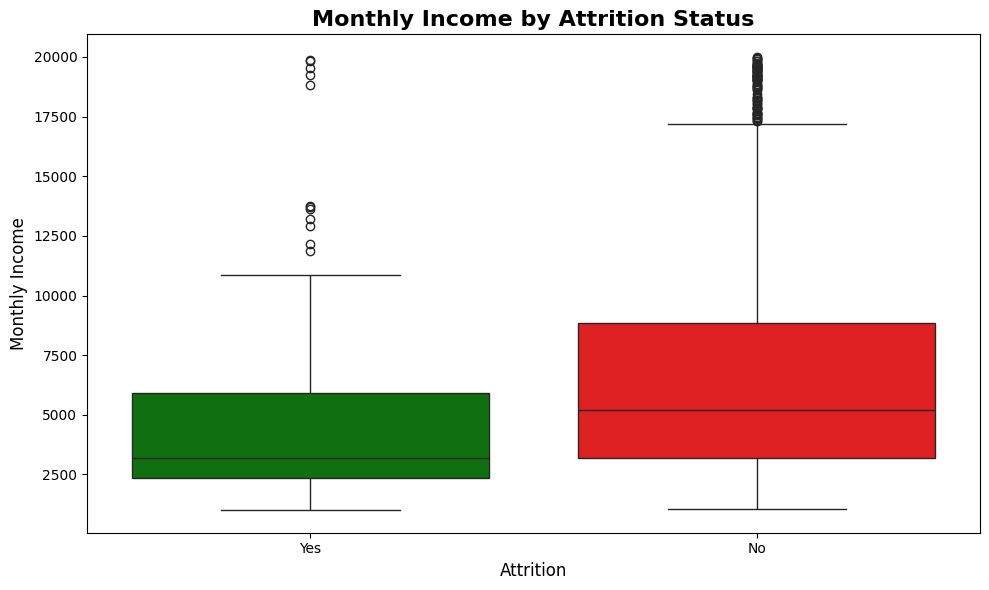

In [489]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df,palette=['green','red'])
plt.title("Monthly Income by Attrition Status",fontsize=16,fontweight='bold')
plt.xlabel('Attrition',fontsize=12)
plt.ylabel('Monthly Income',fontsize=12)
plt.tight_layout()
plt.show()

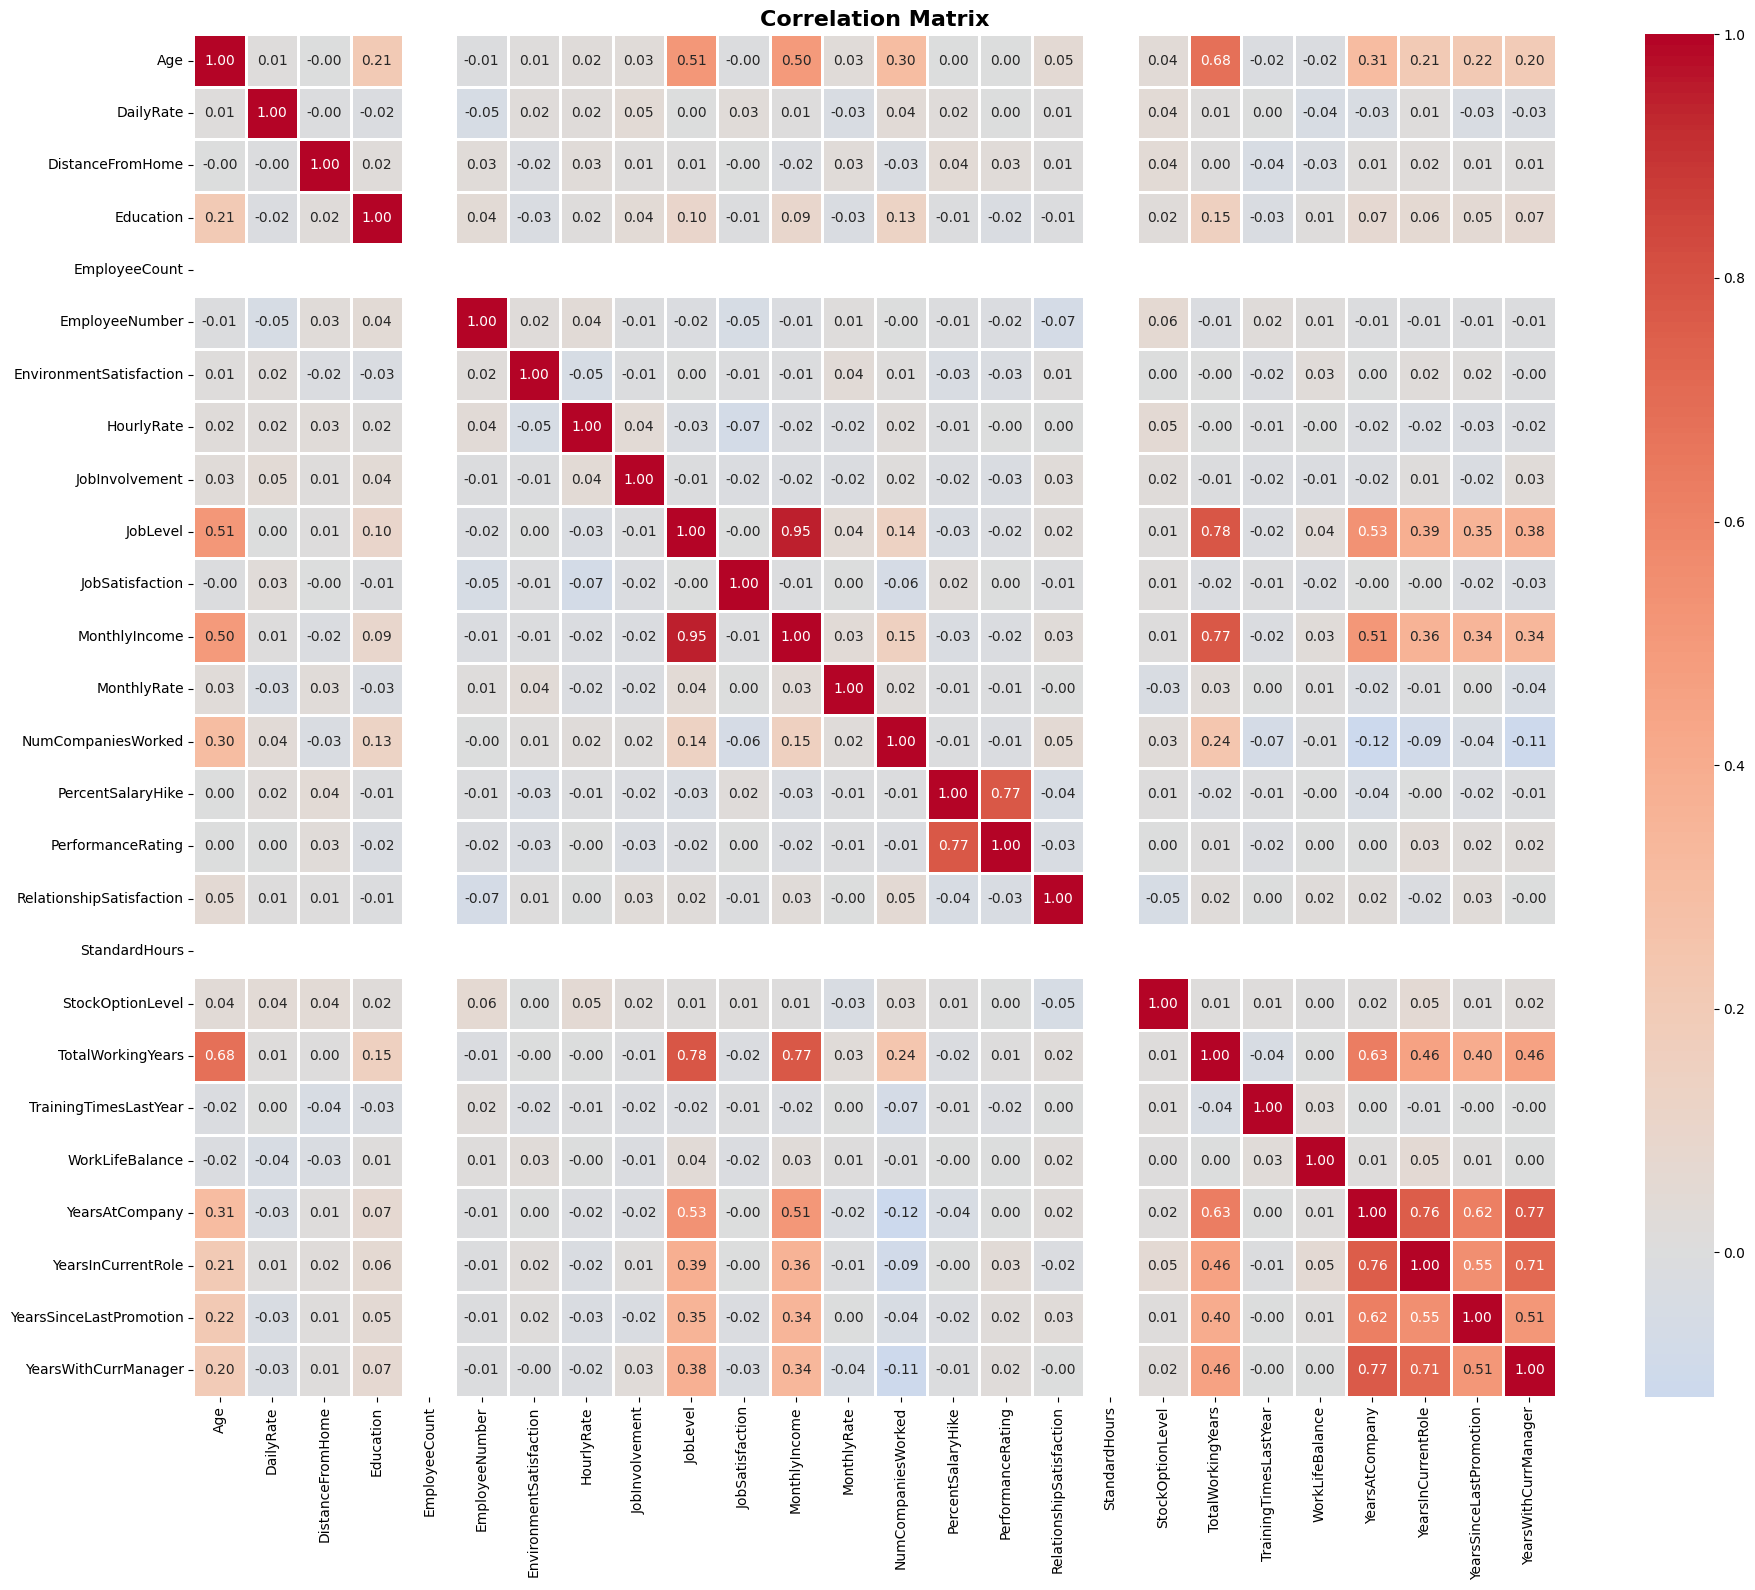

In [490]:
plt.figure(figsize=(20,16))
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
corr_matrix=df[numeric_cols].corr()
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',center=0,square=True,linewidths=1)
plt.title("Correlation Matrix",fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

Preprocessing

In [491]:
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [492]:
le=LabelEncoder()
binary_cols=['Attrition','Gender','OverTime']
for col in binary_cols:
    df[col]=le.fit_transform(df[col])

In [493]:
# Encode remaining categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Separating Features and Target Variable

In [494]:
y_classfication=df['Attrition']
y_regression=df['MonthlyIncome']
X=df.drop(columns=['Attrition','MonthlyIncome'], axis=1)

In [495]:
from sklearn.feature_selection import SelectKBest,f_classif,f_regression
selector_cls=SelectKBest(score_func=f_classif, k=10)
X_cls_selected=selector_cls.fit_transform(X,y_classfication)
selected_features_cls=X.columns[selector_cls.get_support()]
print("\nTop 10 Features for Classification:")
print(selected_features_cls.tolist())


Top 10 Features for Classification:
['Age', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [496]:
selector_reg=SelectKBest(score_func=f_regression, k=10)
X_reg_selected=selector_reg.fit_transform(X,y_regression)
selected_features_reg=X.columns[selector_reg.get_support()]
print("\nTop 10 Features for Regression:")
print(selected_features_reg.tolist())


Top 10 Features for Regression:
['Age', 'Education', 'JobLevel', 'JobRole', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [497]:
final_features=list(set(selected_features_cls).intersection(selected_features_reg))
print("Final Selected Features:",final_features)

Final Selected Features: ['Age', 'YearsWithCurrManager', 'YearsAtCompany', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole']


In [499]:
X_final=X[final_features]

In [500]:
print(f"Features shape: {X_final.shape}")
print(f"Classification target shape: {y_classfication.shape}")
print(f"Regression target shape: {y_regression.shape}")

Features shape: (1470, 6)
Classification target shape: (1470,)
Regression target shape: (1470,)


In [501]:
#feature scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_final)

In [502]:
#Train test split for classification
X_train_c,X_test_c,y_train_c,y_test_c=train_test_split(
    X_scaled,y_classfication,test_size=0.2,random_state=42,stratify=y_classfication
    )

In [503]:
#Train test split for Regression
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(
    X_scaled,y_regression,test_size=0.2,random_state=42
)

In [504]:
print("Classification Models - Attrition Prediction")

Classification Models - Attrition Prediction


In [505]:
#Classification model
classification_results = {}

#Training with Logistic Regression
log_reg=LogisticRegression(random_state=42,max_iter=1000)
log_reg.fit(X_train_c,y_train_c)
y_pred_lr=log_reg.predict(X_test_c)

In [506]:
acc_lr=accuracy_score(y_test_c,y_pred_lr)
cr_lr=classification_report(y_test_c,y_pred_lr)

/home/intellect/Documents/Supervised_HR_Analytics/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/intellect/Documents/Supervised_HR_Analytics/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/intellect/Documents/Supervised_HR_Analytics/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co

In [507]:
classification_results['Logistic Regression'] = {
    'Accuracy':acc_lr,"classification_report":cr_lr
}

In [508]:
print("Logistic Regression Results:")
print(f"Accuracy Score:{acc_lr:.4f}")
print(f"\nClassification Report:\n{cr_lr}")
print(f"Confusion Matrix \n{confusion_matrix(y_test_c,y_pred_lr)}")

Logistic Regression Results:
Accuracy Score:0.8401

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

Confusion Matrix 
[[247   0]
 [ 47   0]]


In [509]:
#Training with K-Nearest Neighbors
knn_cl=KNeighborsClassifier(n_neighbors=5)
knn_cl.fit(X_train_c,y_train_c)
y_pred_knn_cl=knn_cl.predict(X_test_c)

In [510]:
acc_knn_cl=accuracy_score(y_test_c,y_pred_knn_cl)
cr_knn_cl=classification_report(y_test_c,y_pred_knn_cl)

In [511]:
classification_results['KNN']={
    "Accuracy":acc_knn_cl,"Classification report":cr_knn_cl
}

In [512]:
print("KNN Results:")
print(f"Accuracy Score:{acc_knn_cl:.4f}")
print(f"Classification Report:\n{cr_knn_cl}")
print(f"Confusion Matrix \n{confusion_matrix(y_test_c,y_pred_knn_cl)}")

KNN Results:
Accuracy Score:0.7959
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       247
           1       0.22      0.11      0.14        47

    accuracy                           0.80       294
   macro avg       0.53      0.52      0.51       294
weighted avg       0.74      0.80      0.77       294

Confusion Matrix 
[[229  18]
 [ 42   5]]


In [513]:
#Training with Decision Tree Classifier
dt_cl=DecisionTreeClassifier(random_state=42,max_depth=10)
dt_cl.fit(X_train_c,y_train_c)
y_pred_dt_cl=dt_cl.predict(X_test_c)

In [514]:
acc_dt_cl=accuracy_score(y_test_c,y_pred_dt_cl)
cr_dt_cl=classification_report(y_test_c,y_pred_dt_cl)

In [515]:
classification_results['DecisionTreeClassifier']={
    "Accuracy":acc_dt_cl,"Classification report":cr_dt_cl
}

In [516]:
print("Decision Tree Classifier Results:")
print(f"Accuracy Score:{acc_dt_cl:.4f}")
print(f"Classification Report:\n{cr_dt_cl}")
print(f"Confusion Matrix \n{confusion_matrix(y_test_c,y_pred_dt_cl)}")

Decision Tree Classifier Results:
Accuracy Score:0.7517
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       247
           1       0.17      0.15      0.16        47

    accuracy                           0.75       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.74      0.75      0.74       294

Confusion Matrix 
[[214  33]
 [ 40   7]]


In [517]:
#Training with Naive Bayes Classifier
nb_cl=GaussianNB()
nb_cl.fit(X_train_c,y_train_c)
y_pred_nb_cl=dt_cl.predict(X_test_c)

In [518]:
acc_nb_cl=accuracy_score(y_test_c,y_pred_nb_cl)
cr_nb_cl=classification_report(y_test_c,y_pred_nb_cl)

In [519]:
classification_results['Naive Bayes Classifier']={
    "Accuracy":acc_nb_cl,"Classification report":cr_nb_cl
}

In [520]:
print("Naive bayes Classifier Results:")
print(f"Accuracy Score:{acc_nb_cl:.4f}")
print(f"Classification Report:\n{cr_nb_cl}")
print(f"Confusion Matrix \n{confusion_matrix(y_test_c,y_pred_nb_cl)}")

Naive bayes Classifier Results:
Accuracy Score:0.7517
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       247
           1       0.17      0.15      0.16        47

    accuracy                           0.75       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.74      0.75      0.74       294

Confusion Matrix 
[[214  33]
 [ 40   7]]


In [521]:
#Training with RandomForestClassifier
rf_cl=RandomForestClassifier(n_estimators=100,random_state=42)
rf_cl.fit(X_train_c,y_train_c)
y_pred_rf_cl=dt_cl.predict(X_test_c)

In [522]:
acc_rf_cl=accuracy_score(y_test_c,y_pred_rf_cl)
cr_rf_cl=classification_report(y_test_c,y_pred_rf_cl)

In [523]:
classification_results['Naive Bayes Classifier']={
    "Accuracy":acc_rf_cl,"Classification report":cr_rf_cl
}

In [524]:
print("Random Forest Classifier Results:")
print(f"Accuracy Score:{acc_rf_cl:.4f}")
print(f"Classification Report:\n{cr_rf_cl}")
print(f"Confusion Matrix \n{confusion_matrix(y_test_c,y_pred_rf_cl)}")

Random Forest Classifier Results:
Accuracy Score:0.7517
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       247
           1       0.17      0.15      0.16        47

    accuracy                           0.75       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.74      0.75      0.74       294

Confusion Matrix 
[[214  33]
 [ 40   7]]


In [525]:
print("Regression Models - Salary Prediction")

Regression Models - Salary Prediction


In [526]:
regression_results = {}

In [527]:
#Training with Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_r,y_train_r)
y_pred_lr_r=lin_reg.predict(X_test_r)

In [528]:
mae_lin=mean_absolute_error(y_test_r,y_pred_lr_r)
mse_lin=mean_squared_error(y_test_r,y_pred_lr_r)
r2_lin=r2_score(y_test_r,y_pred_lr_r)
rmse_lin=np.sqrt(mse_lin)

In [529]:
regression_results['LinearRegression']={
    "MAE":mae_lin,
    "MSE":mse_lin,
    "RMSE":rmse_lin,
    "R2":r2_lin
}

In [530]:
print(f"MAE: ${mae_lin:.2f}")
print(f"MSE: ${mse_lin:.2f}")
print(f"RMSE: ${rmse_lin:.2f}")
print(f"R2 Score: {r2_lin:.4f}")

MAE: $1157.69
MSE: $2270446.82
RMSE: $1506.80
R2 Score: 0.8961


In [531]:
#Training with KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_r,y_train_r)
y_pred_knn_r=knn_reg.predict(X_test_r)

In [532]:
mae_knn=mean_absolute_error(y_test_r,y_pred_knn_r)
mse_knn=mean_squared_error(y_test_r,y_pred_knn_r)
r2_knn=r2_score(y_test_r,y_pred_knn_r)
rmse_knn=np.sqrt(mse_knn)

In [533]:
regression_results['KNeighborsRegressor']={
    "MAE":mae_knn,
    "MSE":mse_knn,
    "RMSE":rmse_knn,
    "R2":r2_knn
}

In [534]:
print(f"MAE: ${mae_knn:.2f}")
print(f"MSE: ${mse_knn:.2f}")
print(f"RMSE: ${rmse_knn:.2f}")
print(f"R2 Score: {r2_knn:.4f}")

MAE: $1183.65
MSE: $2808547.44
RMSE: $1675.87
R2 Score: 0.8715


In [535]:
#Training with Decision Tree Regressor
dt_reg=DecisionTreeRegressor(random_state=42,max_depth=10)
dt_reg.fit(X_train_r,y_train_r)
y_pred_dt_r=dt_reg.predict(X_test_r)

In [536]:
mae_dt=mean_absolute_error(y_test_r,y_pred_dt_r)
mse_dt=mean_squared_error(y_test_r,y_pred_dt_r)
r2_dt=r2_score(y_test_r,y_pred_dt_r)
rmse_dt=np.sqrt(mse_dt)

In [537]:
regression_results['DecisionTreeRegressor']={
    "MAE":mae_dt,
    "MSE":mse_dt,
    "RMSE":rmse_dt,
    "R2":r2_dt
}

In [538]:
print(f"MAE: ${mae_dt:.2f}")
print(f"MSE: ${mse_dt:.2f}")
print(f"RMSE: ${rmse_dt:.2f}")
print(f"R2 Score: {r2_dt:.4f}")

MAE: $1122.54
MSE: $2483430.51
RMSE: $1575.89
R2 Score: 0.8864


In [539]:
#Training with RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(X_train_r,y_train_r)
y_pred_rf_r=rf_reg.predict(X_test_r)

In [540]:
mae_rf=mean_absolute_error(y_test_r,y_pred_rf_r)
mse_rf=mean_squared_error(y_test_r,y_pred_rf_r)
r2_rf=r2_score(y_test_r,y_pred_rf_r)
rmse_rf=np.sqrt(mse_rf)

In [541]:
regression_results['RandomForestRegressor']={
    "MAE":mae_rf,
    "MSE":mse_rf,
    "RMSE":rmse_rf,
    "R2":r2_rf
}

In [542]:
print(f"MAE: ${mae_rf:.2f}")
print(f"MSE: ${mse_rf:.2f}")
print(f"RMSE: ${rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.4f}")

MAE: $963.45
MSE: $1781990.84
RMSE: $1334.91
R2 Score: 0.9185


In [543]:
print("MODEL COMPARISON RESULTS")

MODEL COMPARISON RESULTS


In [544]:
print("\n8.1 CLASSIFICATION RESULTS:")
classification_df = pd.DataFrame(classification_results).T
classification_df = classification_df.sort_values('Accuracy', ascending=False)
print(classification_df.to_string())


8.1 CLASSIFICATION RESULTS:
                        Accuracy                                                                                                                                                                                                                                                                                                                           classification_report                                                                                                                                                                                                                                                                                                                           Classification report
Logistic Regression     0.840136                precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91       247\n           1       0.00      0.00      0.00        47\n\n    accuracy                           0.84       294\n   macro

In [545]:
accuracy_df = classification_df[["Accuracy"]]
accuracy_df

,Accuracy
Logistic Regression,0.840136
KNN,0.795918
DecisionTreeClassifier,0.751701
Naive Bayes Classifier,0.751701


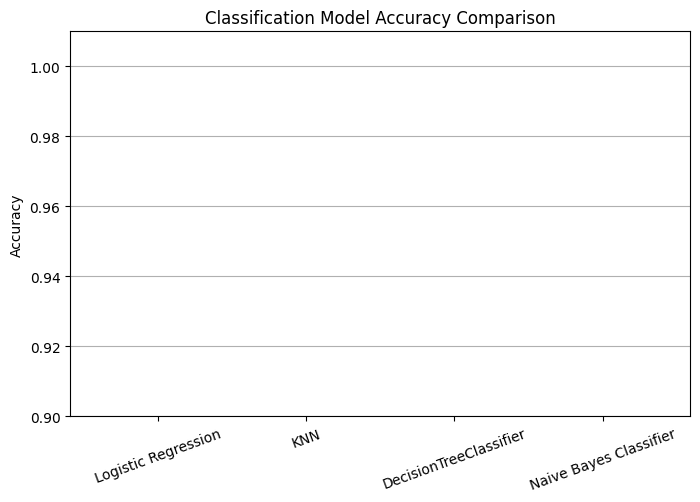

In [553]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(accuracy_df.index, accuracy_df["Accuracy"])
plt.ylim(0.9,1.01)
plt.title("Classification Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()


In [547]:
print("Regression Results:")
regression_df=pd.DataFrame(regression_results).T
regression_df=regression_df.sort_values('R2',ascending=False)
print(regression_df.to_string())

Regression Results:
                               MAE           MSE         RMSE        R2
RandomForestRegressor   963.448909  1.781991e+06  1334.912298  0.918465
LinearRegression       1157.688999  2.270447e+06  1506.800191  0.896115
DecisionTreeRegressor  1122.539999  2.483431e+06  1575.890388  0.886370
KNeighborsRegressor    1183.654422  2.808547e+06  1675.872142  0.871494


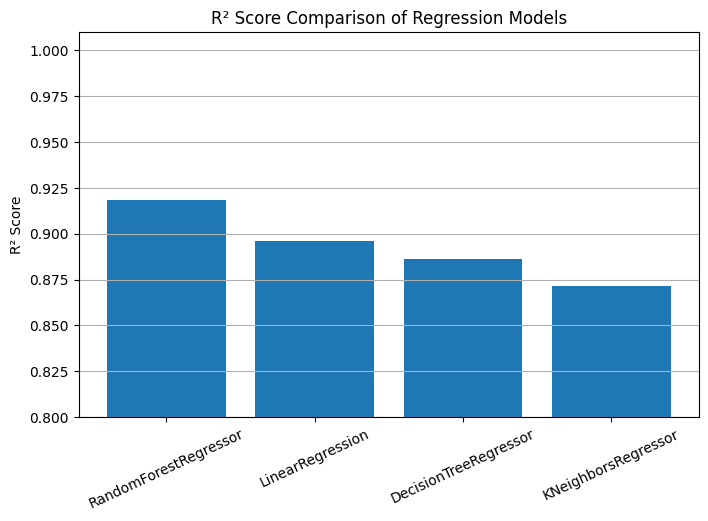

In [548]:
plt.figure(figsize=(8,5))
plt.bar(regression_df.index, regression_df["R2"])
plt.title("R² Score Comparison of Regression Models")
plt.ylabel("R² Score")
plt.xticks(rotation=25)
plt.ylim(0.8,1.01)
plt.grid(axis='y')
plt.show()

In [549]:
best_classifier = classification_df.index[0]
best_classifier_acc = classification_df.iloc[0]['Accuracy']

best_regressor = regression_df.index[0]
best_regressor_r2 = regression_df.iloc[0]['R2']

print(f"\n🏆 BEST CLASSIFICATION MODEL: {best_classifier}")
print(f"   Accuracy: {best_classifier_acc:.4f}")

print(f"\n🏆 BEST REGRESSION MODEL: {best_regressor}")
print(f"   R² Score: {best_regressor_r2:.4f}")


🏆 BEST CLASSIFICATION MODEL: Logistic Regression
   Accuracy: 0.8401

🏆 BEST REGRESSION MODEL: RandomForestRegressor
   R² Score: 0.9185


In [554]:
import joblib 
joblib.dump(log_reg, "best_classifier.pkl")
joblib.dump(lin_reg, "best_regressor.pkl")
joblib.dump(scaler, "scaler.pkl")   # important
joblib.dump(X_final.columns.tolist(), "features.pkl")

joblib.dump(knn_cl, "knn.pkl")
joblib.dump(dt_cl, "decision_tree.pkl")
joblib.dump(nb_cl, "naive_bayes.pkl")
joblib.dump(rf_cl, "random_forest.pkl")
joblib.dump(rf_reg, "rf_reg.pkl")

['rf_reg.pkl']

In [551]:
joblib.dump(rf_reg,"rf_reg.pkl")

['rf_reg.pkl']